In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
from manofunkcijos import pout
from dateutil import parser

In [47]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()

In [ ]:
# 1) su plot() nubraižykite BrentOilPrices istorinius duomenis. Duomenis imkite iš SQL lentelės BrentOilPrices.
# 2) Pridėkite vartotojo įvestį, kad su input() būtų galima nurodyti metus (nuo, iki), kurių istorinius duomenis norite pamatyti.

In [3]:
sql="""select * from BrentOilPrices;
"""

C.execute(sql)
ans = C.fetchall()


date, price= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 8360
|    20-May-87     |      18.63       |
|    21-May-87     |      18.45       |
|    22-May-87     |      18.55       |
|    25-May-87     |       18.6       |
|    26-May-87     |      18.63       |
|    27-May-87     |       18.6       |


In [11]:
dates = [parser.parse(row[0]) for row in ans]

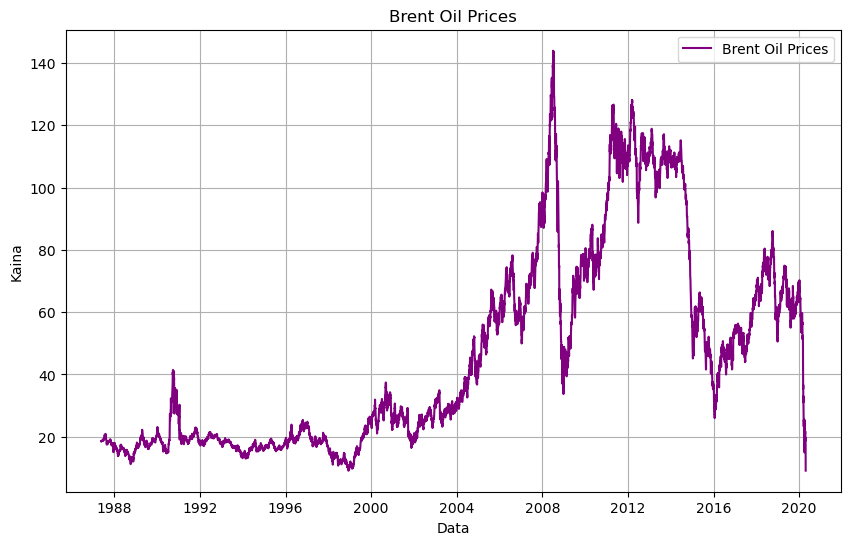

In [12]:


plt.figure(figsize=(10, 6))
plt.plot(dates, price, label='Brent Oil Prices', color='purple')
plt.xlabel('Data')
plt.ylabel('Kaina')
plt.title('Brent Oil Prices')
plt.legend()
plt.grid(True)
plt.show()

Rodoma 5 eilutės iš 8360
|    20-May-87     |      18.63       |
|    21-May-87     |      18.45       |
|    22-May-87     |      18.55       |
|    25-May-87     |       18.6       |
|    26-May-87     |      18.63       |
|    27-May-87     |       18.6       |
[datetime.datetime(2014, 1, 2, 0, 0), datetime.datetime(2014, 1, 3, 0, 0), datetime.datetime(2014, 1, 6, 0, 0), datetime.datetime(2014, 1, 7, 0, 0), datetime.datetime(2014, 1, 8, 0, 0), datetime.datetime(2014, 1, 9, 0, 0), datetime.datetime(2014, 1, 10, 0, 0), datetime.datetime(2014, 1, 13, 0, 0), datetime.datetime(2014, 1, 14, 0, 0), datetime.datetime(2014, 1, 15, 0, 0), datetime.datetime(2014, 1, 16, 0, 0), datetime.datetime(2014, 1, 17, 0, 0), datetime.datetime(2014, 1, 20, 0, 0), datetime.datetime(2014, 1, 21, 0, 0), datetime.datetime(2014, 1, 22, 0, 0), datetime.datetime(2014, 1, 23, 0, 0), datetime.datetime(2014, 1, 24, 0, 0), datetime.datetime(2014, 1, 27, 0, 0), datetime.datetime(2014, 1, 28, 0, 0), datetime.datetime(

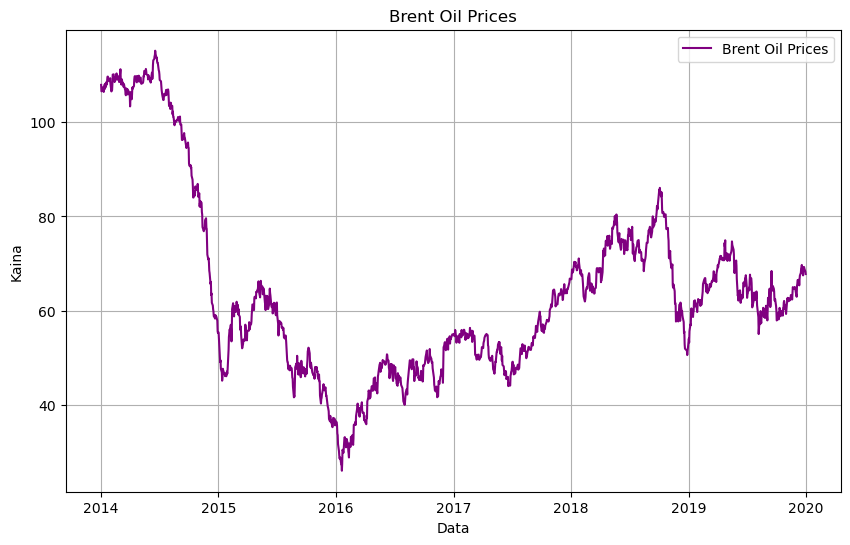

In [31]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()




start_year =int( input("Iveskite pradzios metus "))
end_year = int(input("Iveskite pabaigos metus "))

sql="""select date, price 
from BrentOilPrices 
;"""

# C.execute(sql, )
C.execute(sql)
ans = C.fetchall()


date, price= list(map(list, zip(*ans)))

pout(ans)


dates = [parser.parse(row[0]) for row in ans]

fdates = []
fprices = []

for row in ans:
    date = parser.parse(row[0])
    if start_year <= date.year <= end_year:
        fdates.append(date)
        fprices.append(float(row[1]))

print(fdates)


plt.figure(figsize=(10, 6))
plt.plot(fdates, fprices, label='Brent Oil Prices', color='purple')
plt.xlabel('Data')
plt.ylabel('Kaina')
plt.title('Brent Oil Prices')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
sql="""select month(dataLaikas) as month, count(*) as incident_count
from EismIvyk2021
group by month(dataLaikas)
order by incident_count desc;"""

C.execute(sql)
ans = C.fetchall()


menuo, incidentai= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 12
|        12        |       2371       |
|        10        |       2203       |
|        6         |       2202       |
|        11        |       2198       |
|        5         |       2166       |
|        8         |       2084       |


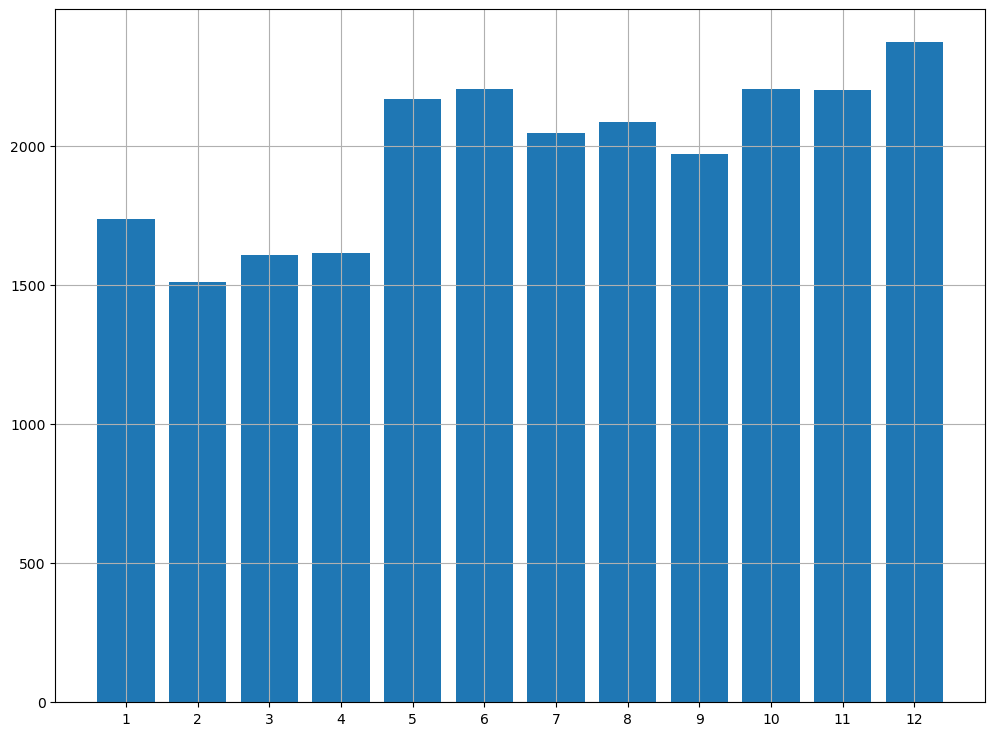

In [41]:
fig, ax1 = plt.subplots( figsize=(12,9))
ax1.bar(menuo, incidentai)
# ax2.bar(gamintojas, unik)
ax1.set_xticks(menuo)
plt.grid(True)
plt.show()

In [43]:
sql="""select hour(dataLaikas) as hour, count(*) as incident_count
from EismIvyk2021
group by hour(dataLaikas)
order by incident_count desc;"""

C.execute(sql)
ans = C.fetchall()


valanda, incidentai= list(map(list, zip(*ans)))

pout(ans)




Rodoma 5 eilutės iš 24
|        17        |       1924       |
|        18        |       1636       |
|        16        |       1593       |
|        19        |       1488       |
|        15        |       1463       |
|        14        |       1361       |


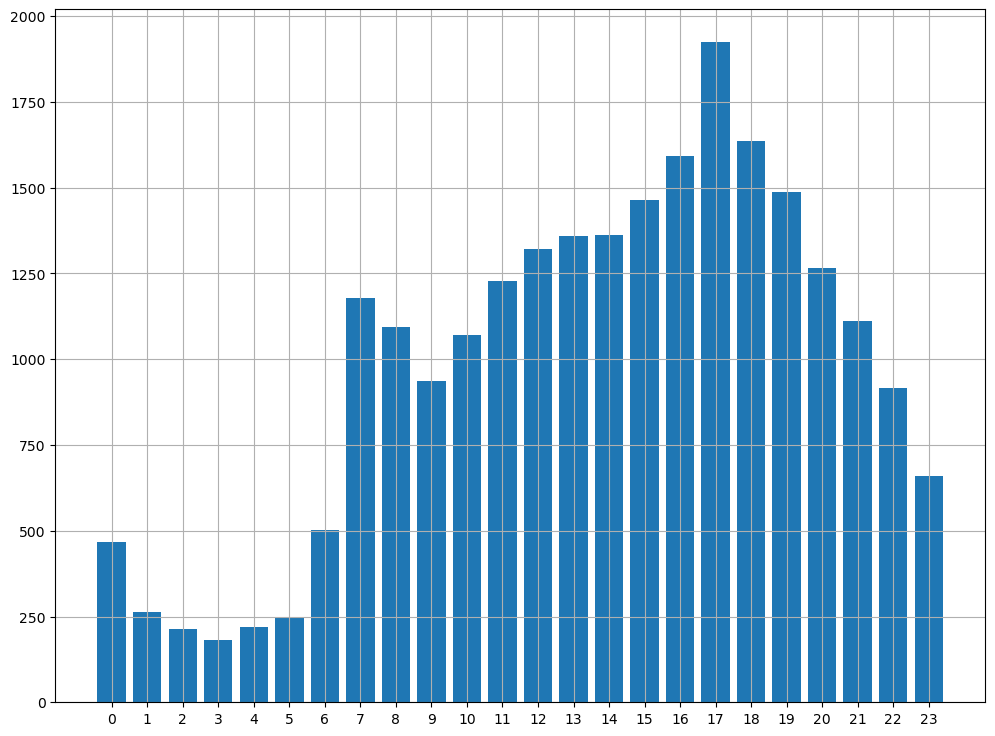

In [45]:
fig, ax1 = plt.subplots( figsize=(12,9))
ax1.bar(valanda, incidentai)
# ax2.bar(gamintojas, unik)
ax1.set_xticks(valanda)
plt.grid(True)
plt.show()

In [48]:
sql="""select BORO, count(STATISTICAL_MURDER_FLAG) from nypd
where STATISTICAL_MURDER_FLAG =1 
group by BORO
order by count(STATISTICAL_MURDER_FLAG) desc;"""

C.execute(sql)
ans = C.fetchall()


borrow, incidentai= list(map(list, zip(*ans)))

pout(ans)

|     BROOKLYN     |       1912       |
|      BRONX       |       1267       |
|      QUEENS      |       707        |
|    MANHATTAN     |       520        |
|  STATEN ISLAND   |       146        |


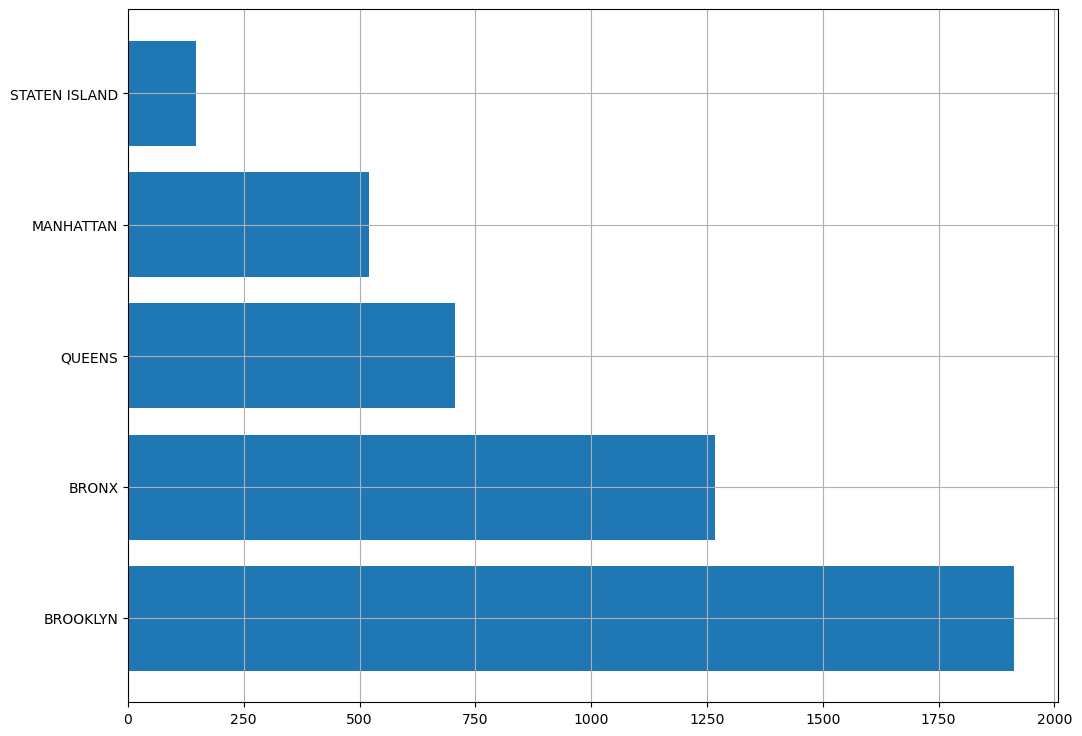

In [50]:
fig, ax1 = plt.subplots( figsize=(12,9))
ax1.barh(borrow, incidentai)
# ax2.bar(gamintojas, unik)
# ax1.set_xticks(borrow)
plt.grid(True)
plt.show()

In [52]:
sql="""select hour(OCCUR_TIME) , count(STATISTICAL_MURDER_FLAG) from nypd
where STATISTICAL_MURDER_FLAG =1 
group by hour(OCCUR_TIME)
order by count(STATISTICAL_MURDER_FLAG) desc;"""

C.execute(sql)
ans = C.fetchall()


time, incidentai= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 24
|        22        |       385        |
|        0         |       329        |
|        1         |       328        |
|        21        |       326        |
|        23        |       322        |
|        2         |       285        |


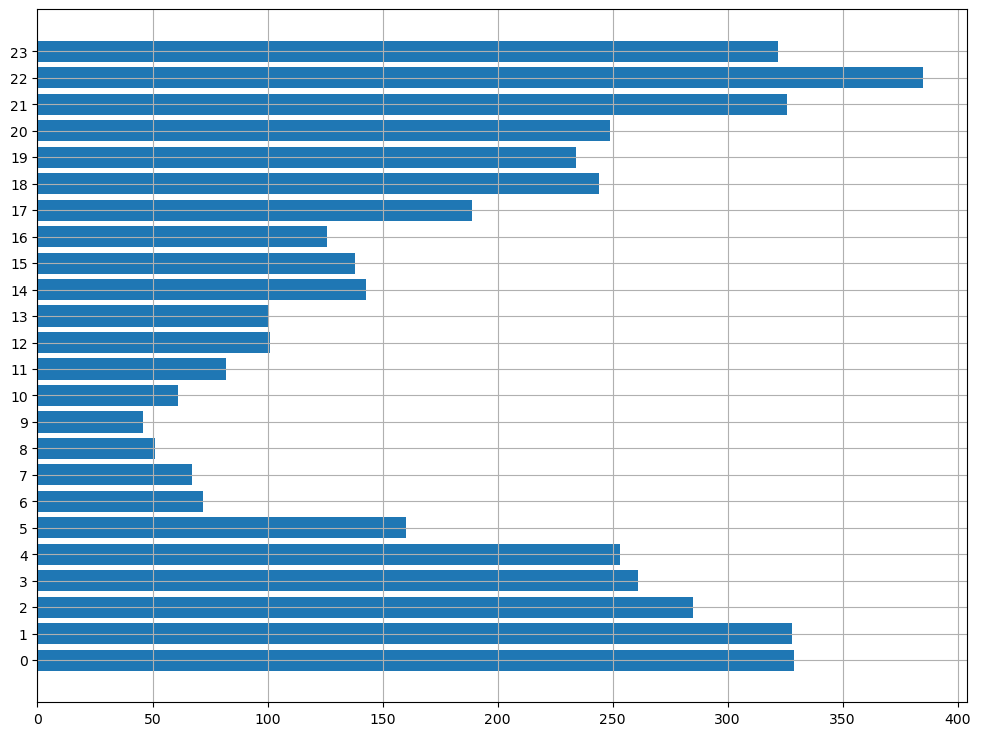

In [54]:
fig, ax1 = plt.subplots( figsize=(12,9))
ax1.barh(time, incidentai)
# ax2.bar(gamintojas, unik)
ax1.set_yticks(time)
plt.grid(True)
plt.show()

In [55]:
sql="""select H, c0, c1, c1/c0*100 as p from
(select H, count(*) as C0 from
(select hour(cast(OCCUR_TIME as time)) as H, BORO, STATISTICAL_MURDER_FLAG from nypd)
as ttn
group by H) as th1
join
(select H, count(*) as C1 from
(select hour(cast(OCCUR_TIME as time)) as H, BORO, STATISTICAL_MURDER_FLAG from nypd)
as ttn
where STATISTICAL_MURDER_FLAG = 1
group by H) as th2
using (H);"""

C.execute(sql)
ans = C.fetchall()


time, incidentai, mirtys, proc= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 24
|        0         |       1928       |       329        |     17.0643      |
|        1         |       1877       |       328        |     17.4747      |
|        2         |       1635       |       285        |     17.4312      |
|        3         |       1468       |       261        |     17.7793      |
|        4         |       1301       |       253        |     19.4466      |
|        5         |       641        |       160        |     24.9610      |


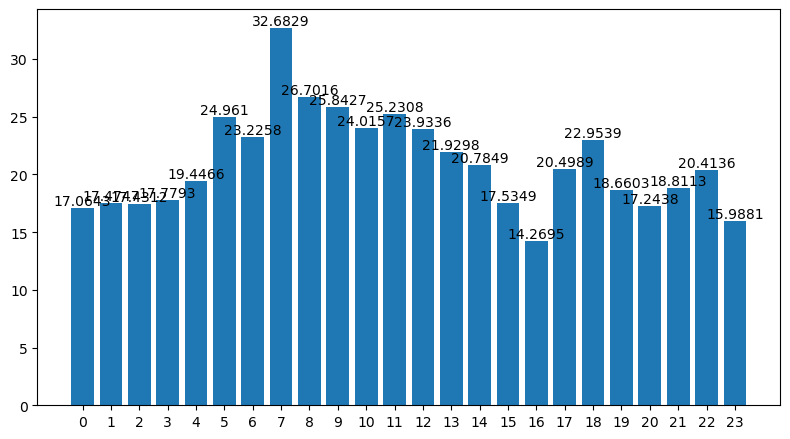

In [56]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
p = axis.bar(time, proc)
axis.set_xticks(time)
axis.bar_label(p)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()